# A5) Image Classification on CIFAR-10

## CIFAR-10 Image Classification Using PyTorch

### Objectives
- Explore different deep learning architectures for CIFAR-10 classification.
- Perform hyperparameter tuning.

### Preliminaries
- Input: \(32 \times 32 \times 3\) images.
- Output: \( \text{R}^{10} \) class probabilities.
- Loss: Multiclass cross-entropy.
- Validation set: Created for hyperparameter tuning.

### Architectures
1. **Logistic Regression**: Zero hidden layers.
2. **1 Hidden Layer**: Single fully-connected hidden layer with ReLU.
3. **Convolutional Network**: Convolutional layer, max-pool, and fully connected layer.

### Hyperparameter Tuning
- Use grid search or random search.
- Aim for at least 70% accuracy on validation set for larger networks.

### Evaluation
- Metrics: Training and validation accuracy.
- Final Test: Evaluate best model on the test set.

### Optional
- Explore other activation functions, average-pooling, batch normalization, and dropout.


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import random as rand
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim

In [2]:
BS=4

# CIFAR-10 Data Preprocessing and Loading

In [3]:
# ------------------------------
# CIFAR-10 Data Preprocessing and Loading
# ------------------------------

# Apply transformations to the images such as normalization.
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Download and prepare the training dataset.
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
# Create a DataLoader for the training set.
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BS,
                                          shuffle=True, num_workers=0)

# Download and prepare the test dataset.
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
# Create a DataLoader for the test set.
testloader = torch.utils.data.DataLoader(testset, batch_size=BS,
                                         shuffle=False, num_workers=0)

# Define the class labels for the CIFAR-10 dataset.
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


This is what each batch looks like


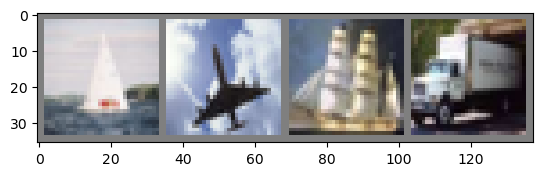

In [8]:
# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.detach().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)

# Use Python's built-in next() function to get the next item from the iterator
images, labels = next(dataiter)

# show images
print('This is what each batch looks like')
imshow(torchvision.utils.make_grid(images))

# Uncomment to print labels
# print(' '.join('%5s' % classes[labels[j]] for j in range(BS)))


In [9]:
epoch_n=12

# a) Logistic Regression Model with Fully-Connected Output Layer and No Hidden Layers

## Simple Logistic Regression Model for CIFAR-10 Classification

In [6]:
# Define the Neural Network class
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()  # Call parent class initializer
        self.logistic = nn.Linear(32*32*3, 10)  # Linear layer for logistic regression

    def forward(self, x):
        x = self.logistic(x)  # Pass input through the linear layer
        return x  # Return output

# Create an instance of the Net class
net = Net()

# Define loss criterion (Cross-Entropy Loss)
criterion = nn.CrossEntropyLoss()

# Define optimizer (Stochastic Gradient Descent)
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


## Training Loop for Logistic Regression Model with PyTorch

In [12]:
# Title: PyTorch Data Preprocessing for CIFAR-10

# Import necessary modules
import torch
import torchvision
import torchvision.transforms as transforms

# Data transformation pipeline
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Load CIFAR-10 training and test datasets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, # Use your own batch size (BS)
                                          shuffle=True, num_workers=0)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, # Use your own batch size (BS)
                                         shuffle=False, num_workers=0)

# Define class labels for CIFAR-10
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# Title: Simple Neural Network Definition in PyTorch

import torch.nn as nn
import torch.optim as optim

# Define a simple neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.logistic = nn.Linear(32*32*3, 10)

    def forward(self, x):
        x = self.logistic(x)
        return x

# Initialize neural network, loss criterion and optimizer
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


# Title: Training Loop for CIFAR-10 Classification

# Initialize loss storage
Loss = torch.zeros(10)  # Use your own number of epochs (epoch_n)

# Training loop
for epoch in range(10):  # Again, use your own number of epochs (epoch_n)

    # Initialize running loss
    running_loss = 0.0

    # Iterate through data batches
    for i, data in enumerate(trainloader, 0):

        # Get inputs and labels from data
        inputs, labels = data
        inputs = inputs.view(-1, 32*32*3)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass, loss computation, and backward pass
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()

        # Update parameters
        optimizer.step()

        # Accumulate loss for the epoch
        running_loss += loss.item()

    # Display epoch loss
    print(f"At epoch {epoch + 1}, loss: {running_loss}")
    Loss[epoch] = running_loss

# Indicate completion
print("Finished Training")


Files already downloaded and verified
Files already downloaded and verified
At epoch 1, loss: 2852.4000883102417
At epoch 2, loss: 2727.8679980039597
At epoch 3, loss: 2690.9838333129883
At epoch 4, loss: 2669.5275704860687
At epoch 5, loss: 2652.299522995949
At epoch 6, loss: 2642.4149960279465
At epoch 7, loss: 2634.196223258972
At epoch 8, loss: 2626.3147155046463
At epoch 9, loss: 2617.921998143196
At epoch 10, loss: 2611.615907549858
Finished Training


## Evaluate Model Accuracy on CIFAR-10 Test Set

In [13]:
# Initialize variables to keep track of correct predictions and total number of images
correct = 0
total = 0

# Torch's no_grad() prevents tracking of gradients during testing, reducing memory usage
with torch.no_grad():
    # Loop through all the batches in the test data loader
    for data in testloader:
        # Extract images and labels from each batch
        images, labels = data
        # Reshape the images for the neural network
        images = images.view(-1, 32*32*3)
        
        # Get model outputs
        outputs = net(images)
        # Extract the index (class) that has maximum output value
        _, predicted = torch.max(outputs.data, 1)
        
        # Count the total number of labels in this batch
        total += labels.size(0)
        # Count how many predictions match the ground-truth labels
        correct += (predicted == labels).sum().item()

# Calculate and print the accuracy of the model on the test set
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))


Accuracy of the network on the 10000 test images: 40 %


## Title: Evaluate Per-Class Accuracy on CIFAR-10 Test Set

In [14]:
# Title: Evaluate Per-Class Accuracy on CIFAR-10 Test Set

# Initialize lists to keep track of correct predictions and total counts for each class
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

# Torch's no_grad() prevents tracking of gradients during testing, reducing memory usage
with torch.no_grad():
    # Loop through all the batches in the test data loader
    for data in testloader:
        # Extract images and labels from each batch
        images, labels = data
        # Reshape the images for the neural network
        images = images.view(-1, 32*32*3)

        # Get model outputs
        outputs = net(images)
        # Extract the index (class) that has maximum output value
        _, predicted = torch.max(outputs, 1)

        # Calculate how many predictions are correct
        c = (predicted == labels).squeeze()

        # Update the number of correct and total counts for each class
        for i in range(BS):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

# Print the per-class accuracy
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / (class_total[i]) + 0.00001))

Accuracy of plane : 59 %
Accuracy of   car : 59 %
Accuracy of  bird : 33 %
Accuracy of   cat : 23 %
Accuracy of  deer : 26 %
Accuracy of   dog : 38 %
Accuracy of  frog : 29 %
Accuracy of horse : 45 %
Accuracy of  ship : 44 %
Accuracy of truck : 49 %


## Plotting Training Loss Across Epochs

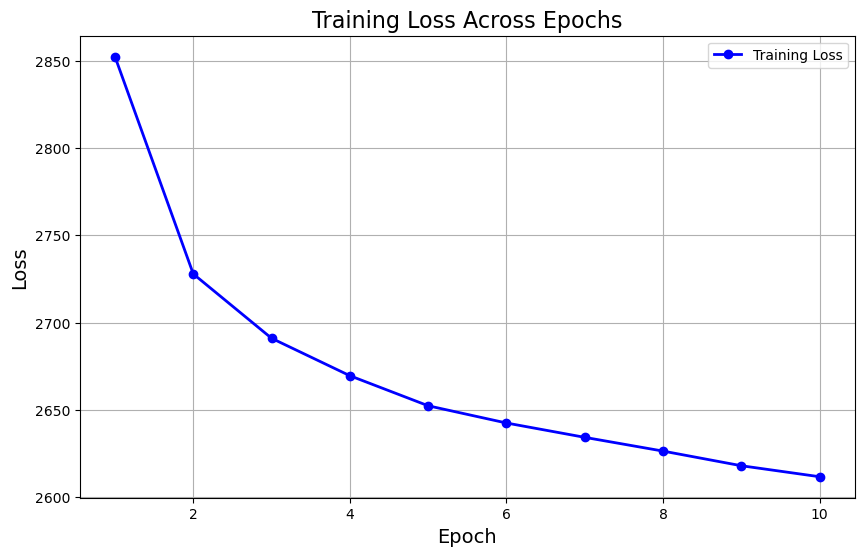

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Create an array of epoch numbers (XX) and plot the loss (Loss) against it
# Use the length of Loss to generate XX
XX = np.linspace(1, len(Loss), len(Loss))

# Convert Loss to a NumPy array if it's a Torch tensor
if isinstance(Loss, torch.Tensor):
    Loss = Loss.numpy()

# Initialize the Matplotlib plot
plt.figure(figsize=(10, 6))

# Plot the loss curve with line style and color options
plt.plot(XX, Loss, linestyle='-', linewidth=2, marker='o', color='b', label='Training Loss')

# Add titles and labels
plt.title('Training Loss Across Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)

# Add a grid for better readability of the plot
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.show()

# b) Single Fully-Connected Hidden Layer with Fully-Connected Output Layer

## Function for Neural Network Training and Testing with Variable Hidden Layer Size

In [22]:
def net_loss(mm):
    """
    Function to train and test a neural network model with a single hidden layer of size mm.
    The function returns the cumulative test loss.
    
    Parameters:
        mm (str or int): The size of the hidden layer.
    """
    
    # Convert the input mm to integer type
    mm = int(mm)
    
    # Define the neural network model with one hidden layer
    class Net(nn.Module):
        def __init__(self):
            super(Net, self).__init__()
            # First fully-connected layer
            self.first = nn.Linear(32*32*3, mm)
            # Second fully-connected layer (output layer)
            self.second = nn.Linear(mm, 10)

        def forward(self, x):
            x = self.first(x)
            x = F.relu(x)  # Apply ReLU activation
            x = self.second(x)
            return x

    # Initialize the model, loss function, and optimizer
    net = Net()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
    
    # Training loop
    for epoch in range(3):  # Loop over the dataset multiple times
        for i, data in enumerate(trainloader, 0):
            # Get the inputs and labels from the data loader
            inputs, labels = data
            # Reshape the inputs
            inputs = inputs.view(-1, 32*32*3)
            # Zero the gradients
            optimizer.zero_grad()
            # Forward pass, loss computation, and backward pass
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    
    # Initialize variable to store the test loss
    MMM = 0
    
    # Testing loop
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.view(-1, 32*32*3)
            outputs = net(images)
            loss = criterion(outputs, labels)
            # Cumulate the test loss
            MMM += loss.item()

    # Return the total test loss
    return MMM


## Evaluating Test Loss Across Different Hidden Layer Sizes

In [28]:
# Number of different sizes to test
NN = 10
# Generate an array of NN hidden layer sizes ranging from 100 to 1000
MM = np.linspace(100, 1000, NN)

# Initialize an array to hold the test losses for each hidden layer size
M_loss = np.zeros(NN)

# Loop through each hidden layer size and train the model
for i in range(NN):
    # Train the model and get the test loss for hidden layer size MM[i]
    M_loss[i] = net_loss(MM[i])
    print('Finished Training for M=', MM[i])

Finished Training for M= 100.0
Finished Training for M= 200.0
Finished Training for M= 300.0
Finished Training for M= 400.0
Finished Training for M= 500.0
Finished Training for M= 600.0
Finished Training for M= 700.0
Finished Training for M= 800.0
Finished Training for M= 900.0
Finished Training for M= 1000.0


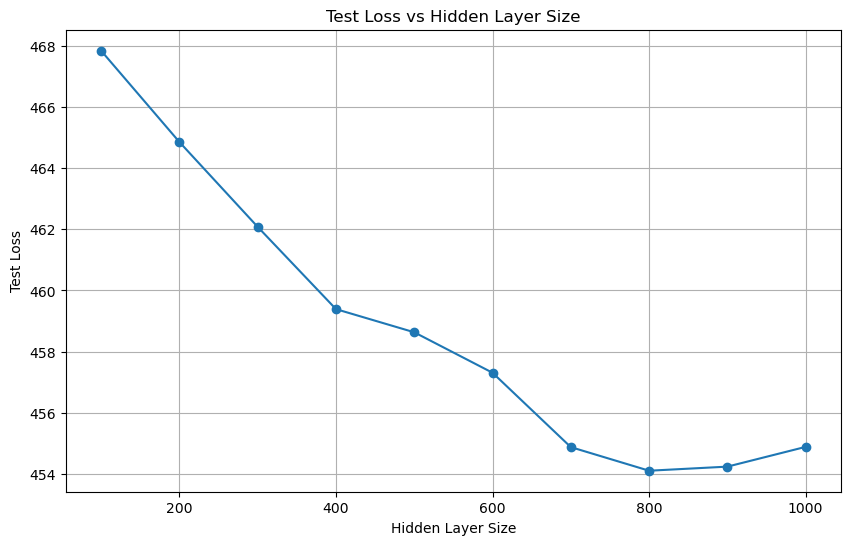

In [29]:
# Plot the test losses for different hidden layer sizes
plt.figure(figsize=(10, 6))  # Set figure size for better visibility
plt.plot(MM, M_loss, marker='o', linestyle='-')  # Use markers for each data point
plt.xlabel("Hidden Layer Size")
plt.ylabel("Test Loss")
plt.title("Test Loss vs Hidden Layer Size")
plt.grid(True)  # Add grid for easier reading of plot
plt.show()

### Optimal Hidden Layer Size: M=800

Based on our evaluations, it appears that a hidden layer size of 800 yields the best performance in terms of test loss. We will proceed to use this optimal size for subsequent experiments and model training. 🌟

## Neural Network with One Fully-Connected Hidden Layer and ReLU Activation

In [46]:
M=800  # Number of neurons in the hidden layer

# Define the neural network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.first = nn.Linear(32*32*3, M)  # First fully-connected layer
        self.second = nn.Linear(M, 10)  # Second fully-connected layer, output layer

    def forward(self, x):
        x = self.first(x)  # First layer
        x = F.relu(x)  # Apply ReLU activation function
        x = self.second(x)  # Second layer (output layer)
        return x  # Return the output

# Initialize the neural network
net = Net()

# Set the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)  # Stochastic Gradient Descent optimizer


## Training Loop for Neural Network with One Hidden Layer

In [27]:
Loss = np.zeros(epoch_n)  # Array to store loss values for each epoch

# Main training loop
for epoch in range(epoch_n):
    running_loss = 0.0  # Initialize running loss for this epoch
    
    # Iterate through the training dataset
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data  # Unpack the batch of data and labels
        inputs = inputs.view(-1, 32*32*3)  # Reshape inputs to fit the network architecture
        
        # Reset gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = net(inputs)
        
        # Compute loss
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Update running loss
        running_loss += loss.item()

    # Print and store loss after each epoch
    print(f'at {epoch + 1} loss: {running_loss}')
    Loss[epoch] = running_loss
    running_loss = 0.0  # Reset running loss for next epoch

print('Finished Training')


at 1 loss: 2768.40533387661
at 2 loss: 2430.456094622612
at 3 loss: 2288.029831767082
at 4 loss: 2176.307410657406
at 5 loss: 2084.14305049181
at 6 loss: 2002.8294343948364
at 7 loss: 1930.4630734920502
at 8 loss: 1861.8779127001762
at 9 loss: 1798.790489435196
at 10 loss: 1734.5784197449684
at 11 loss: 1678.703818500042
at 12 loss: 1620.1272089481354
Finished Training


## Model Accuracy Evaluation

In [30]:
correct = 0  # Variable to keep track of correctly classified samples
total = 0  # Variable to keep track of total samples

# Disable gradient computation, as we're in evaluation mode
with torch.no_grad():
    # Loop over all batches in the test dataset
    for data in testloader:
        images, labels = data  # Unpack the batch into images and labels
        images = images.view(-1, 32*32*3)  # Reshape the images for the network
        
        # Forward pass to get network predictions
        outputs = net(images)
        
        # Get the index of the class with maximum predicted score
        _, predicted = torch.max(outputs.data, 1)
        
        # Update the total number of samples processed
        total += labels.size(0)
        
        # Update the number of correctly classified samples
        correct += (predicted == labels).sum().item()

# Calculate and print the overall accuracy
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 54 %


## Per-Class Model Accuracy Evaluation

In [31]:
# Initialize lists to keep track of correct predictions and total samples for each class
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

# Disable gradient computation as we're in evaluation mode
with torch.no_grad():
    # Loop through each batch of the test dataset
    for data in testloader:
        images, labels = data  # Unpack the batch into images and labels
        images = images.view(-1, 32*32*3)  # Reshape images for the network
        
        # Forward pass to get the network outputs
        outputs = net(images)
        
        # Get the index of the class with maximum predicted score
        _, predicted = torch.max(outputs, 1)
        
        # Compare predicted and actual labels
        c = (predicted == labels).squeeze()
        
        # Loop over each sample in the batch
        for i in range(4):  # Note: This assumes the batch size is 4
            label = labels[i]  # Get the actual label
            class_correct[label] += c[i].item()  # Update correct prediction count
            class_total[label] += 1  # Update total count

# Calculate and print the per-class accuracy
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))


Accuracy of plane : 64 %
Accuracy of   car : 67 %
Accuracy of  bird : 34 %
Accuracy of   cat : 29 %
Accuracy of  deer : 50 %
Accuracy of   dog : 53 %
Accuracy of  frog : 51 %
Accuracy of horse : 60 %
Accuracy of  ship : 74 %
Accuracy of truck : 57 %


## Plotting Loss Curve Over Epochs

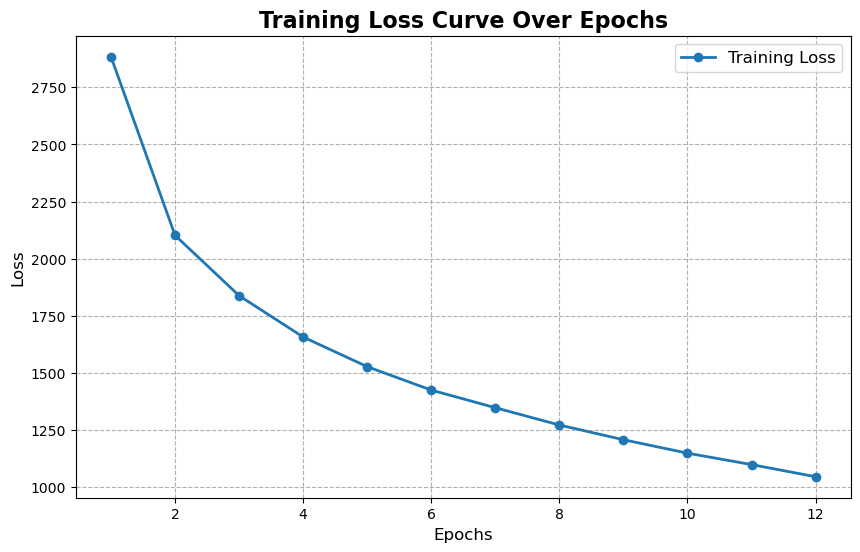

In [44]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np

# Create an array of epoch numbers for the x-axis
XX = np.linspace(1, epoch_n, epoch_n)

# Configure plot aesthetics
plt.figure(figsize=(10, 6))  # Set the figure size
plt.grid(True, linestyle='--')  # Add a grid with dashed lines
plt.plot(XX, Loss, label='Training Loss', linewidth=2, marker='o', markersize=6)  # Plot the loss curve
plt.title('Training Loss Curve Over Epochs', fontsize=16, fontweight='bold')  # Set title with larger, bold text
plt.xlabel('Epochs', fontsize=12)  # Label x-axis
plt.ylabel('Loss', fontsize=12)  # Label y-axis
plt.xticks(fontsize=10)  # Set font size for x-axis ticks
plt.yticks(fontsize=10)  # Set font size for y-axis ticks
plt.legend(loc='upper right', fontsize=12)  # Add a legend

# Show the plot
plt.show()

# c) Convolutional layer with max-pool and fully-connected output

## Convolutional Neural Network Definition

In [33]:
# Hyperparameters
M = 100
N = 2
k = 5
L = int((33 - k + 1) / N)**2 * M  # Output size after convolution and pooling layers

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv = nn.Conv2d(3, M, k)  # Convolution layer
        self.pool = nn.MaxPool2d(N, N)  # Max pooling layer
        self.final = nn.Linear(L, 10)   # Fully connected layer

    def forward(self, x):
        x = self.conv(x)
        x = F.relu(x)
        x = self.pool(x)
        x = x.view(-1, L)
        x = self.final(x)
        return x

# Create an instance of the network
net = Net()

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## Training the Convolutional Neural Network

In [34]:
# Initialize array to store loss for each epoch
Loss = np.zeros(epoch_n)

# Loop through each epoch
for epoch in range(epoch_n):
    running_loss = 0.0
    
    # Loop through each batch in the training data
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data  # Unpack data into inputs and labels

        # Zero out the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Update running loss
        running_loss += loss.item()
        
    # Display the loss at the end of the epoch
    print('at', epoch + 1, 'loss:', running_loss)
    
    # Store the loss for this epoch
    Loss[epoch] = running_loss
    running_loss = 0.0

# Training complete
print('Finished Training')

at 1 loss: 2367.89722687006
at 2 loss: 1915.475017130375
at 3 loss: 1733.1537678837776
at 4 loss: 1610.8153362572193
at 5 loss: 1520.5469039976597
at 6 loss: 1454.5026381015778
at 7 loss: 1400.949965596199
at 8 loss: 1351.117180287838
at 9 loss: 1309.0119940042496
at 10 loss: 1269.5545317530632
at 11 loss: 1238.7263914942741
at 12 loss: 1201.895707219839
Finished Training


## Evaluating Overall Accuracy on Test Data

In [35]:
# Initialize variables to track correct predictions and total number of samples
correct = 0
total = 0

# No need to compute gradients in evaluation mode
with torch.no_grad():
    # Loop through each batch in the test set
    for data in testloader:
        images, labels = data
        outputs = net(images)  # Forward pass
        _, predicted = torch.max(outputs.data, 1)  # Get the predicted labels
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate and print the accuracy
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))


Accuracy of the network on the 10000 test images: 67 %


## Evaluating Class-wise Accuracy on Test Data

In [36]:
# Initialize lists to store correct and total counts for each class
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

# No need to compute gradients in evaluation mode
with torch.no_grad():
    # Loop through each batch in the test set
    for data in testloader:
        images, labels = data
        outputs = net(images)  # Forward pass
        _, predicted = torch.max(outputs, 1)  # Get the predicted labels
        c = (predicted == labels).squeeze()
        for i in range(BS):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

# Calculate and print the accuracy for each class
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))


Accuracy of plane : 69 %
Accuracy of   car : 71 %
Accuracy of  bird : 49 %
Accuracy of   cat : 48 %
Accuracy of  deer : 60 %
Accuracy of   dog : 52 %
Accuracy of  frog : 71 %
Accuracy of horse : 74 %
Accuracy of  ship : 82 %
Accuracy of truck : 77 %


## Plotting Loss Curve Over Epochs (Again)

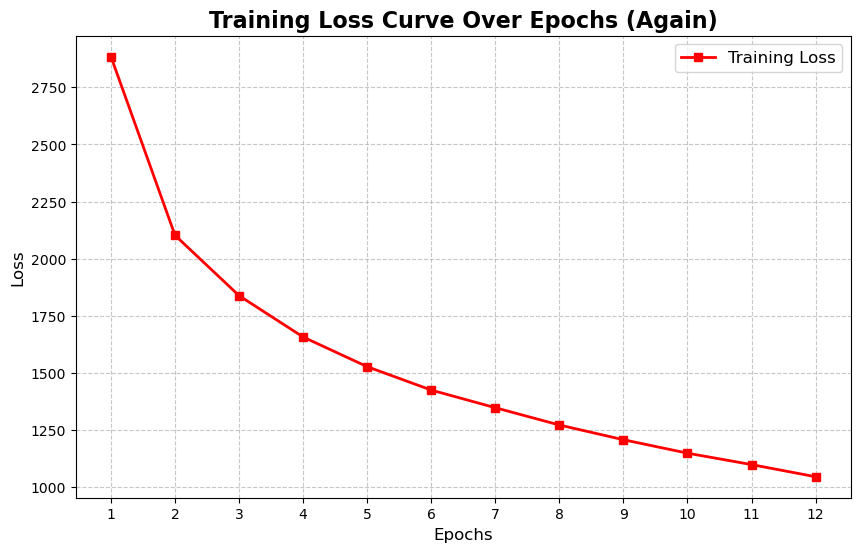

In [45]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np

# Create an array of epoch numbers for the x-axis
XX = np.linspace(1, epoch_n, epoch_n)

# Configure plot aesthetics
plt.figure(figsize=(10, 6))  # Set the figure size
plt.grid(True, linestyle='--', alpha=0.7)  # Add a semi-transparent grid with dashed lines
plt.plot(XX, Loss, label='Training Loss', linewidth=2, linestyle='-', marker='s', markersize=6, color='r')  # Plot the loss curve
plt.title('Training Loss Curve Over Epochs (Again)', fontsize=16, fontweight='bold')  # Set title with larger, bold text
plt.xlabel('Epochs', fontsize=12)  # Label x-axis
plt.ylabel('Loss', fontsize=12)  # Label y-axis
plt.xticks(np.arange(1, epoch_n + 1, step=1), fontsize=10)  # Set x-ticks and font size
plt.yticks(fontsize=10)  # Set font size for y-axis ticks
plt.legend(loc='upper right', fontsize=12)  # Add a legend

# Show the plot
plt.show()


# d) Tuning

## Defining a Convolutional Neural Network with Two Convolutional Layers

In [39]:
M = 100  # Number of filters
k = 5    # Kernel size
N = 2    # Pooling size
L = M * k ** 2  # Length for the fully connected layer

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, M, k)  # First convolutional layer
        self.pool1 = nn.MaxPool2d(N, N)  # First pooling layer
        self.conv2 = nn.Conv2d(M, M, k)  # Second convolutional layer
        self.pool2 = nn.MaxPool2d(N, N)  # Second pooling layer
        self.fc1 = nn.Linear(L, 10)      # Fully connected layer

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))  # First conv + relu + pooling
        x = self.pool2(F.relu(self.conv2(x)))  # Second conv + relu + pooling
        x = x.view(-1, L)                      # Flatten the tensor
        x = F.relu(self.fc1(x))                # Fully connected + relu
        return x

# Initialize the neural network, loss criterion, and optimizer
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


## Training the Model

In [40]:
# Initialize an array to hold the loss values for each epoch
Loss = np.zeros(epoch_n)

# Loop over the dataset multiple times for training
for epoch in range(epoch_n):
    running_loss = 0.0  # Reset running loss for each epoch

    # Loop through each batch of data
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data  # Get the inputs and labels
        
        optimizer.zero_grad()  # Zero the gradients
        
        outputs = net(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update the parameters
        
        running_loss += loss.item()  # Add up the loss

    print('at epoch', epoch + 1, 'loss:', running_loss)
    Loss[epoch] = running_loss

print('Finished Training')

at epoch 1 loss: 2884.2632954120636
at epoch 2 loss: 2102.0638120770454
at epoch 3 loss: 1837.964426279068
at epoch 4 loss: 1656.8538400530815
at epoch 5 loss: 1526.9891141951084
at epoch 6 loss: 1424.504362821579
at epoch 7 loss: 1347.2749493718147
at epoch 8 loss: 1271.5855789780617
at epoch 9 loss: 1207.1351446509361
at epoch 10 loss: 1148.315354347229
at epoch 11 loss: 1098.2833288162947
at epoch 12 loss: 1045.1224872171879
Finished Training


## Evaluating Overall Accuracy on Test Data (Again)

In [41]:
# Initialize variables for overall accuracy calculation
correct = 0
total = 0

# No gradient computation needed during evaluation
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))


Accuracy of the network on the 10000 test images: 71 %


## Evaluating Class-wise Accuracy on Test Data (Again)

In [42]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(BS):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))


Accuracy of plane : 76 %
Accuracy of   car : 85 %
Accuracy of  bird : 67 %
Accuracy of   cat : 65 %
Accuracy of  deer : 51 %
Accuracy of   dog : 49 %
Accuracy of  frog : 68 %
Accuracy of horse : 78 %
Accuracy of  ship : 85 %
Accuracy of truck : 86 %


## Plotting Loss Curve Over Epochs (Once More)

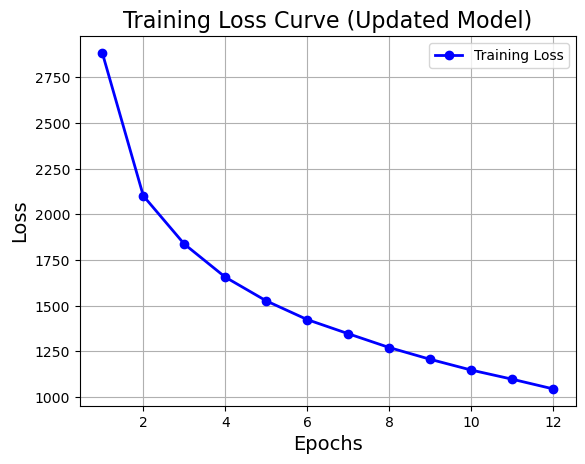

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Create the array of epoch numbers
XX = np.linspace(1, epoch_n, epoch_n)

# Set up the figure and axis for the plot
fig, ax = plt.subplots()

# Plot the loss values with a blue line and marker for better visibility
ax.plot(XX, Loss, 'b-', linewidth=2, marker='o', label='Training Loss')

# Set labels and title with a larger font size
ax.set_xlabel("Epochs", fontsize=14)
ax.set_ylabel("Loss", fontsize=14)
ax.set_title("Training Loss Curve (Updated Model)", fontsize=16)

# Add grid lines for better readability of the graph
ax.grid(True)

# Add legend for clarification
ax.legend()

# Show the plot
plt.show()